<a href="https://colab.research.google.com/github/10zinchosang/Summer2022-DataAnalytics/blob/main/Diabetes_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

We are given a dataset on diabetic patient records from a span of 10 years. We will conduct EDA, build four predictive models, and evaluate them. For our prediction we will try to classify if someone will be readmitted in less than 30 days.

#Data Exploration (EDA)

## Import stuff

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/10zinchosang/Summer2020-DataFiles/main/diabetic_data.csv')

## Basic stuff

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [ ]:
columns = df.columns

In [ ]:
columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [64]:
columns.unique

<bound method Index.unique of Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')>

In [65]:
# Checking out what unique values each column has
for i in columns:
    if len(df[i].unique()) < 20:
        print(i,'has ', set(df[i]))

race has  {'Caucasian', 'AfricanAmerican', 'Other', 'Asian'}
gender has  {'Male', 'Female'}
age has  {'[60-70)', '[50-60)', '[0-10)', '[40-50)', '[20-30)', '[70-80)', '[10-20)', '[90-100)', '[80-90)', '[30-40)'}
weight has  {'[125-150)', '[100-125)', '>200', '[0-25)', '[150-175)', '[50-75)', '[175-200)', '[75-100)', '[25-50)'}
admission_type_id has  {1, 2, 3, 4, 5, 6}
discharge_disposition_id has  {1, 2, 3, 4, 5, 6, 7, 11, 13, 18}
admission_source_id has  {1, 4, 5, 6, 7, 17}
time_in_hospital has  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
payer_code has  {'DM', 'BC', 'WC', '?', 'OT', 'HM', 'SP', 'MD', 'MC', 'CM', 'UN', 'CP', 'CH'}
medical_specialty has  {'Pediatrics', '?', 'Family/GeneralPractice', 'InternalMedicine', 'Psychiatry', 'Dentistry', 'Cardiology', 'Surgery-General', 'ObstetricsandGynecology'}
num_procedures has  {0, 1, 2, 3, 4, 5, 6}
number_outpatient has  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21}
number_emergency has  {0, 1, 2, 3, 4, 5, 6, 7, 9, 10

#Data Preparation (Wrangling/Cleaning, etc.)

## Clean our main df

In [ ]:
df = df[df['race'] != '?']

In [ ]:
df = df[df['gender'] != 'Unknown/Invalid']

In [ ]:
df = df[df['weight'] != '?']

## Int64 dataframe

In [ ]:
df['race'].dtype

dtype('O')

In [ ]:
df['number_diagnoses'].dtype

dtype('int64')

In [ ]:
# Create empyt dataframe and empty list for integer valued columns only
int_df = pd.DataFrame()
int_list = []

In [ ]:
# Go through the columns and add integer valued ones into the list
for i in columns:
    if df[i].dtype == 'int64':
        int_list.append(i)
        print(i)

encounter_id
patient_nbr
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses


In [ ]:
int_list

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [ ]:
# Keep relevant columns
int_list = int_list[5:]

In [ ]:
int_list

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [ ]:
# Create a dataframe from relevant columns
int_df = df[int_list]

In [ ]:
int_df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
1102,2,68,3,15,0,0,0,6
1132,5,71,5,23,0,0,0,7
1136,3,56,3,15,0,0,0,5
1190,11,78,0,18,0,0,1,7
1204,9,72,5,17,0,0,0,7


In [ ]:
# Add in our readmitted column since it is the target
int_df = int_df.join(df['readmitted'])

In [ ]:
int_df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1102,2,68,3,15,0,0,0,6,>30
1132,5,71,5,23,0,0,0,7,>30
1136,3,56,3,15,0,0,0,5,NO
1190,11,78,0,18,0,0,1,7,NO
1204,9,72,5,17,0,0,0,7,>30


## Visualizations

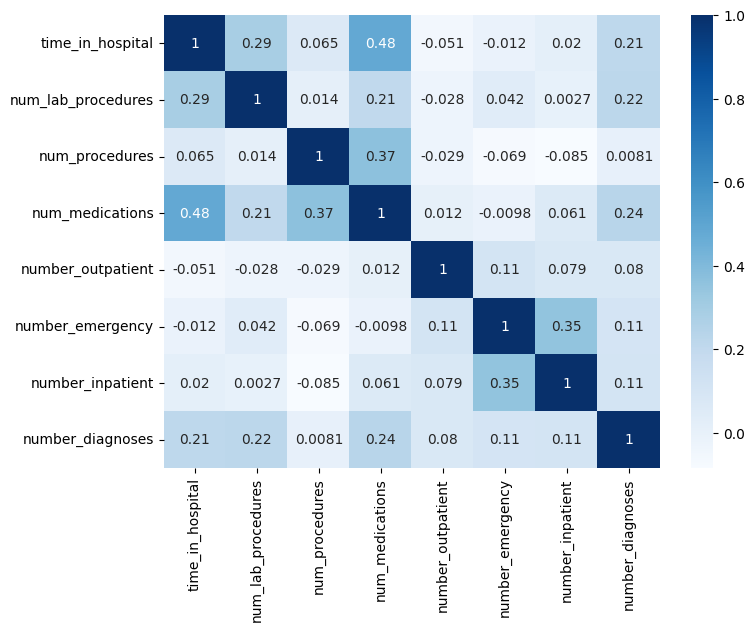

In [ ]:
# Heatmap for correlations
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(int_df.corr(),annot=True,cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrinution of Readmission')

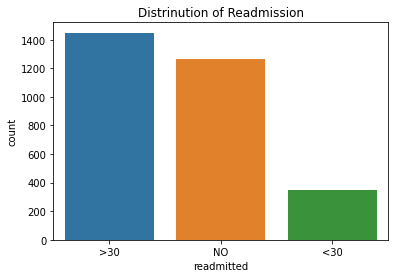

In [ ]:
# Countplot to check out readmitted counts
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

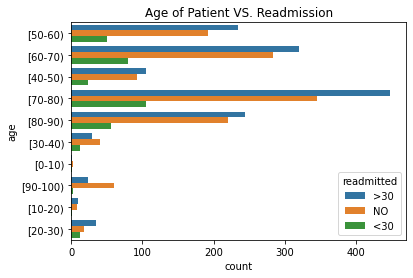

In [ ]:
# Countplot showing us older age groups tend to be readmitted
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

## Best dataframe

In [ ]:
# Added categorical columns I thought would matter
best_df = int_df.join(df[['race','gender','age','weight','diabetesMed']])

### Fix target variable: readmitted

In [ ]:
best_df['readmitted'] = best_df['readmitted'].replace(['NO'], 0)
best_df['readmitted'] = best_df['readmitted'].replace(['>30'], 0)
best_df['readmitted'] = best_df['readmitted'].replace(['<30'], 1)

In [ ]:
best_df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race,gender,age,weight,diabetesMed
1102,2,68,3,15,0,0,0,6,0,Caucasian,Male,[50-60),[75-100),Yes
1132,5,71,5,23,0,0,0,7,0,Caucasian,Female,[60-70),[0-25),Yes
1136,3,56,3,15,0,0,0,5,0,Caucasian,Female,[40-50),[75-100),Yes
1190,11,78,0,18,0,0,1,7,0,Caucasian,Female,[70-80),[75-100),Yes
1204,9,72,5,17,0,0,0,7,0,Caucasian,Female,[80-90),[50-75),Yes


### Get dummies for categorical variables

In [ ]:
best_df = pd.get_dummies(best_df, columns = ['race','gender','age','weight','diabetesMed'])

In [ ]:
best_df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_AfricanAmerican,...,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),diabetesMed_No,diabetesMed_Yes
1102,2,68,3,15,0,0,0,6,0,0,...,0,0,0,0,0,0,0,1,0,1
1132,5,71,5,23,0,0,0,7,0,0,...,1,0,0,0,0,0,0,0,0,1
1136,3,56,3,15,0,0,0,5,0,0,...,0,0,0,0,0,0,0,1,0,1
1190,11,78,0,18,0,0,1,7,0,0,...,0,0,0,0,0,0,0,1,0,1
1204,9,72,5,17,0,0,0,7,0,0,...,0,0,0,0,0,0,1,0,0,1


## Set X and y

In [ ]:
X = best_df.drop(['readmitted'], axis=1)
X.shape

(3059, 35)

In [ ]:
y = best_df['readmitted']
y.shape

(3059,)

## Train Test Split and Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Build Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(scaled_X_train,y_train)
log_pred = logmodel.predict(scaled_X_test)

## KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train,y_train)
knn_pred = knn.predict(scaled_X_test)

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(scaled_X_train,y_train)
dtree_pred = dtree.predict(scaled_X_test)

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(scaled_X_train,y_train)
rfc_pred = rfc.predict(scaled_X_test)

#Evaluate Models

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

## Logistic Regression Evaluation

In [ ]:
print((confusion_matrix(y_test,log_pred)))

[[814   1]
 [103   0]]


In [ ]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       815
           1       0.00      0.00      0.00       103

    accuracy                           0.89       918
   macro avg       0.44      0.50      0.47       918
weighted avg       0.79      0.89      0.83       918



## KNN Algorithm Evaluation

In [ ]:
print((confusion_matrix(y_test,knn_pred)))

[[810   5]
 [102   1]]


In [ ]:
print((classification_report(y_test,knn_pred)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       815
           1       0.17      0.01      0.02       103

    accuracy                           0.88       918
   macro avg       0.53      0.50      0.48       918
weighted avg       0.81      0.88      0.83       918



## Decision Tree Model Evaluation

In [ ]:
print((confusion_matrix(y_test,dtree_pred)))

[[705 110]
 [ 81  22]]


In [ ]:
print((classification_report(y_test,dtree_pred)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       815
           1       0.17      0.21      0.19       103

    accuracy                           0.79       918
   macro avg       0.53      0.54      0.53       918
weighted avg       0.82      0.79      0.80       918



## Random Forest Model Evaluation

In [ ]:
print((confusion_matrix(y_test,rfc_pred)))

[[814   1]
 [102   1]]


In [ ]:
print((classification_report(y_test,rfc_pred)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       815
           1       0.50      0.01      0.02       103

    accuracy                           0.89       918
   macro avg       0.69      0.50      0.48       918
weighted avg       0.85      0.89      0.84       918



#Select Models

With the way I set up my data and ran the models, it seems that `Logistic Regression, KNN, and Random Forest` had the highest accuracies so I would use any of those three. The `Decision Tree Model` had a lower, more modest accuracy of 79% which might be considered better given the small samplying. I cut out a lot of the data when I ignored all rows where weight was '?'. I could also put in different combinations of the other categorical variables, mainly the medications, to see if it would increase accuracy further.